                                Preguntas Teoricas

## ***7. ¿Qué es una promesa en JS?***

[Promesa ▶](https://youtu.be/ZTC0Gfhdzfc)

JavaScript es un lenguaje de programación que destaca por su versatilidad y eficacia, lo que se debe en parte a su capacidad de realizar operaciones **asincrónicas**. Al ser **«single threaded»** (un solo hilo), **sólo puede ejecutar una acción al mismo tiempo**, por lo que el uso de promesas facilita, en buena medida, el control de flujos de datos asíncronos en una aplicación.

**Las promesas** en JavaScript no solo representan el resultado de una operación asincrónica, sino que también proporcionan métodos que facilitan el manejo y la manipulación de los datos una vez que la promesa se resuelve.

> Una promesa es un objeto que representa un valor que puede que esté disponible «ahora», en un «futuro» o que «nunca» lo esté. Como no se sabe cuándo va a estar disponible, todas las operaciones dependientes de ese valor, tendrán que posponerse en el tiempo.

[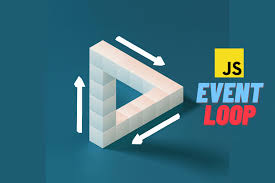 ▶ ](https://www.youtube.com/shorts/qW67Q4_50TQ?feature=share)

### Métodos de las promesas en JavaScript

Aquí están algunos de los métodos más comunes que puedes utilizar:

+ **.then()**: Este método se utiliza para manejar el resultado exitoso de una promesa. Recibe una función que se ejecutará cuando la promesa se resuelva con éxito y puede recibir el resultado como argumento.

+ **.catch()**: Se utiliza para manejar errores que puedan ocurrir durante la ejecución de la promesa. Puedes encadenar .catch() después de .then() para manejar errores específicos.

+ **.finally()**: Este método se utiliza para ejecutar una función después de que la promesa se resuelva o se rechace, independientemente del resultado. Es útil para realizar tareas de limpieza o acciones que deben ocurrir sin importar el resultado de la promesa.

+ **Promise.all(iterable)**: Este método permite manejar múltiples promesas al mismo tiempo y resuelve una promesa una vez que todas las promesas del iterable se hayan resuelto o alguna de ellas se haya rechazado.

+ **Promise.race(iterable)**: Este método resuelve una promesa tan pronto como una de las promesas en el iterable se resuelva o se rechace. Es útil cuando deseas obtener el resultado más rápido de múltiples promesas.

#### Estados de las promesas en JavaScript

Una promesa puede estar en los siguientes tres estados:

+ **Pendiente (pending)**. Es el estado inicial al crear una promesa.
+ **Resuelta con éxito (fulfilled)**. Estará resuelta en el momento que llamemos a resolve y, a continuación, se ejecutará la función que pasamos al método ***.then***. Debemos de tener en cuenta que, una vez resuelta, No podremos modificar el valor de la promesa, aunque sí podríamos correr la misma instrucción para obtener un valor distinto y hacerlo las veces que deseemos.
+ **Rechazada (rejected)**. También puede ocurrir que se complete pero sea rechazada por un error, pasando a continuación a ejecutar la función que pasamos a ***.catch***.

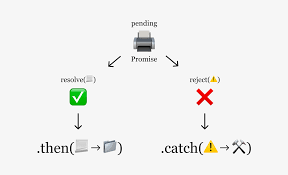

#### Cómo se crea una promesa en JavaScript

Se puede crear una promesa con el constructor promise y pasándole una función con dos parámetros: resolve y reject, que nos deja decirle si ha sido resuelta o rechazada.

In [ ]:
const promise = new Promise((resolve, reject) => {
  const number = Math.floor(Math.random() * 12);
  setTimeout(
    () => (number > 4 ? resolve(number) : reject(new Error("Menor a 4"))),
    2000 // tiempo en milisegundos
  );
});
promise
  .then((number) => console.log(number))
  .catch((error) => console.error(error));

//   En el ejemplo, hemos creado una promesa que se completará en 2 segundos. 
//   Si el número aleatorio que hemos generado es mayor a 4, se resolverá; en caso contrario,
//   se rechaza y se muestra un error.

#### Promesas en JavaScript en cadena (Chaining)

En ocasiones, necesitamos ejecutar **varias operaciones asíncronas una tras otra**, o lo que es lo mismo, *después de una operación ejecutada con éxito, comienza la siguiente*. Esto tiene fácil resolución utilizando una secuencia de **promesas en cadena**.

El archivo, que vamos a llamar texto.txt, devuelve una cadena con la ubicación de otro archivo y seguido de esto, queremos leer ese segundo archivo. Utilizando promesas, quedaría así:

In [ ]:
readFile("./texto.txt")
  .then(readFile)
  .then((data) => console.log(data))
  .catch((error) => console.error(error));

Lo que hacemos es leer texto.txt.

**Si** ocurre un **error**, la promesa **se rechaza** y mostramos el error con console.error.

**Si lo lee**, ejecutamos su lectura en e**l primer .then y corremos un nuevo readFile**.

Este **segundo readFile devuelve una nueva promesa**.

**Si** hay un **error**, ejecuta el **.catch**

**Si no, se ejecuta el segundo .then**, que recibe el contenido del segundo archivo y lo muestra en consola.

Podremos encadenar tantos .then como necesitemos y ejecutar funciones que devuelvan promesas.

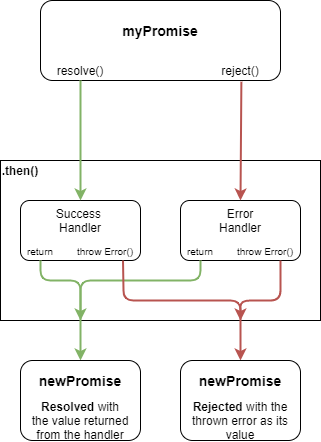

In [ ]:
// Ejemplo de promesa en cadena

import { resolve } from "path";
readFile("./texto.txt.")
  .then(resolve)
  .then(readFile)
  .then((data) => console.log(data))
  .catch((error) => console.error(error));

### Esperar varias promesas

Imaginemos el siguiente supuesto, donde hacemos múltiples tareas asíncronas y queremos realizar una tarea cuando las tres estén resueltas, por lo que necesitamos esperar a tener las tres promesas cumplidas.

Quizás nuestra primera aproximación sería la siguiente: recorrer el array de promesas **promises** con un  **.map()**, de modo que creamos un nuevo array derivado con las promesas ya resueltas, esperando por ellas con un **await**:

In [ ]:
const p1 = fetch("/robots.txt");
const p2 = fetch("/theme.css");
const p3 = fetch("/index.js");

const promises = [p1, p2, p3];

const responses = promises.map(async (promise) => {
  return await promise
});

El planteamiento es correcto, sin embargo, el problema es que la función .map() u otras array functions no permiten el uso de operaciones asíncronas en su interior, ya que trabajan de forma síncrona.

> Si lo hacemos, veremos como la constante responses en lugar de un array de respuestas como probablemente esperábamos, tendrá un array de promesas. Es decir, tendremos exactamente lo mismo que teníamos inicialmente en promises.

Para solucionar este problema, podemos utilizar el objeto Promise de Javascript, que incorpora varios métodos estáticos que podemos utilizar en nuestro código. Todos devuelven una promesa (son asíncronos) y son los que veremos a continuación:

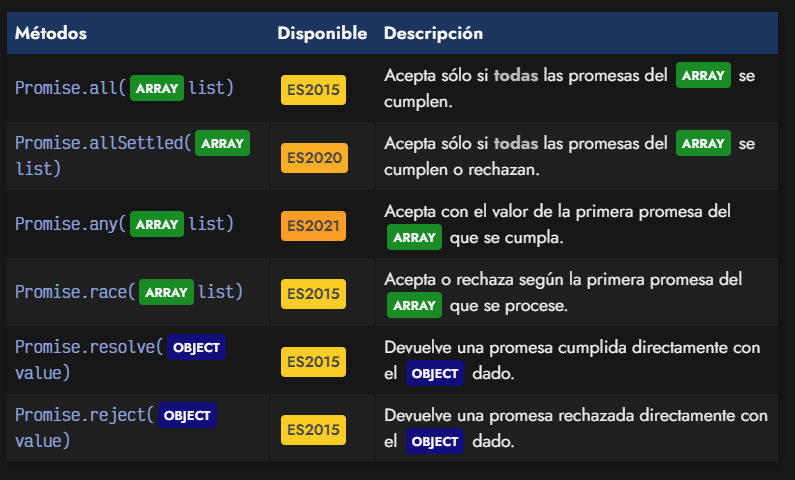

En los siguientes ejemplos, vamos a utilizar la función **fetch()** para realizar varias peticiones y descargar varios archivos diferentes que necesitaremos para nuestras tareas.

### El método Promise.all()

El método **Promise.all()** funciona como un **«todo o nada»**: le pasas un grupo de varias promesas. El *Promise.all()* te devolverá una promesa que se cumplirá cuando **todas las promesas del grupo** se cumplan. Si alguna de ellas se rechaza, la promesa de *Promise.all()* también lo hará.

Observa este ejemplo:

In [ ]:
const p1 = fetch("/robots.txt");
const p2 = fetch("/index.css");
const p3 = fetch("/index.js");

const promises = [p1, p2, p3];

// Utilizando async/await
const responses = await Promise.all(promises);
const codes = responses.map(response => response.status);
console.log(codes); // [200, 200, 200]

+ Realizamos **3 fetch()**, donde cada uno devuelve una promesa.

+ Almacenamos esas 3 promesas en un **array** promises.

+ Al hacer un **Promise.all(promises)** devolvemos una nueva promesa.

+ Dicha promesa se cumplirá, si todas las que pasamos en el array se cumplen invidiualmente.

+ En el caso de que alguna de las 3 se rechace, el *Promise.all()* la promesa se rechaza.

También se podría realizar utilizando **.then()** en lugar de *async/await*:

In [ ]:
// Utilizando .then
Promise.all(promises)
  .then(responses => {
    const codes = responses.map(response => response.status);
    console.log(codes); // [200, 200, 200]
});

### El método Promise.allSettled()

El método **Promise.allSettled()** funciona como un **«todas procesadas»**: devuelve una promesa que se cumple cuando todas las promesas del array se hayan procesado, independientemente de que se hayan cumplido o rechazado.

In [ ]:
const p1 = fetch("/robots.txt");
const p2 = fetch("https://google.com/index.css");
const p3 = fetch("/index.js");

const promises = [p1, p2, p3];

const results = await Promise.allSettled(promises);
const objects = results.map(result => result);
console.log(objects);

Esta operación nos devuelve un **array de objetos** (*uno por cada promesa*) donde cada objeto tiene dos propiedades:

+ La **propiedad status**, donde nos indica si cada promesa individual ha sido cumplida o rechazada
+ La **propiedad value**, con los valores devueltos por la promesa si se cumple.
+ La **propiedad reason**, con la razón del rechazo de la promesa si no se cumple.

En este caso, obtendremos que la *primera y última promesa se resuelven (fulfilled)*, mientras que la *segunda nos da un error* de CORS (origen cruzado) y *se rechaza (rejected)*.

### El método Promise.any()

El método **Promise.any()** funciona como **«la primera que se cumpla»**: Devuelve una promesa con el valor de la primera promesa individual del array que se cumpla. Si todas las promesas se rechazan, entonces devuelve una promesa rechazada.

In [ ]:
const p1 = fetch("/robots.txt");
const p2 = fetch("/index.css");
const p3 = fetch("/index.js");

const promises = [p1, p2, p3];

const response = await Promise.any(promises);
console.log(response);

Como vemos, Promise.any() devolverá una respuesta de la primera promesa cumplida.

### El método Promise.race()

El método **Promise.race()** funciona como una **«la primera que se procese»**: la primera promesa del array que sea procesada, independientemente de que se haya cumplido o rechazado, determinará la devolución de la promesa del Promise.race(). Si se cumple, devuelve una promesa cumplida, en caso negativo, devuelve una rechazada.

In [ ]:
const p1 = fetch("/robots.txt");
const p2 = fetch("/index.css");
const p3 = fetch("/index.js");

const promises = [p1, p2, p3];

const response = await Promise.race([p1, p2, p3]);
console.log(response);

De forma muy similar a la anterior, *Promise.race()* devolverá la promesa que se resuelva primero, ya sea cumpliéndose o rechazándose.

> Las promesas en JavaScript son una herramienta que nos ayuda a manejar operaciones asincrónicas de manera eficiente. Por ello, usarlas de manera adecuada es fundamental para el correcto desarrollo de aplicaciones web, ya que son acciones que se resolverán a futuro (cuando se pueda) y que sabremos si se llevaron a cabo con éxito o no.

🎯 **Así, las promesas son un componente importante dentro de la programación y su dominio es una habilidad valiosa para cualquier desarrollador**

[Saber Más: 🧠 ](https://www.w3schools.com/howto/howto_js_spread_operator.asp)

                                                            EJERCICIOS

* Ejercicio 1:  
**Promesa simple Crea una promesa que se resuelva después de 1 segundo y que devuelva el mensaje “¡Promesa resuelta!”.**

* Ejercicio 2:  
**Promesa que se rechaza Crea una promesa que se rechace después de 2 segundo y que devuelva el mensaje “¡Promesa rechazada!”.**

* Ejercicio 3:  
**Encadenamiento de promesas Crea una promesa que se resuelva con el valor 3 después de 3 segundo. Luego, encadena otras dos promesas que multipliquen el resultado por 2.**

* Ejercicio 4:  
**Manejo de errores en promesas Crea una promesa que se rechace con el mensaje “¡Error!” después de 4 segundo. Asegúrate de manejar el error correctamente.**

* Ejercicio 5:  
**Promesas en paralelo con Promise.all Crea dos promesas, una que se resuelva con el valor 1 después de 1 segundo y otra que se resuelva con el valor 2 después de 2 segundos. Utiliza Promise.all para esperar a que ambas promesas se resuelvan.**

* Ejercicio 6:  
**Promesa que se resuelve primero con Promise.race Crea dos promesas, una que se resuelva con el valor 1 después de 2 segundos y otra que se resuelva con el valor 2 después de 1 segundo. Utiliza Promise.race para obtener el valor de la promesa que se resuelve primero.**

* Ejercicio 7:  
**Promesa con finally Crea una promesa que se resuelva con el mensaje “¡Hecho!” después de 1 segundo. Asegúrate de utilizar finally para imprimir un mensaje cuando la promesa se haya resuelto o rechazado.**

* Ejercicio 8:  
**Promesa con estado pendiente Crea una promesa pero no la resuelvas ni la rechaces. Imprime el estado de la promesa para verificar que está pendiente.**

👍 [Ejercicios  :](ej7.js)